In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [160]:
# TODO: import dataframe from zip file

import zipfile
import io
import requests
import os
import re

def extract_zip_from_url(zip_url, extract_to="./extracted_data"):
    """Extracts a ZIP file from a URL in Google Colab and returns a list of extracted file paths."""
    response = requests.get(zip_url, stream=True)
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content), 'r') as z:
            if not os.path.exists(extract_to):
                os.makedirs(extract_to)
            z.extractall(extract_to)
            return [f for f in z.namelist()]
    else:
        raise Exception(f"Failed to fetch ZIP file: {response.status_code}")

def load_csv_files(folder_path, file_list):
    """Loads extracted CSV files into pandas DataFrames and returns a dictionary of DataFrames."""
    dataframes = {}
    for file_name in file_list:
        if file_name.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file_name))
            dataframes[file_name] = df
    return dataframes

zip_url = "https://drive.google.com/uc?export=download&id=1F9ff--NVo00RwyyRsjWJWVpRj62Ox87a"  # Replace with the URL you want/need
extracted_files = extract_zip_from_url(zip_url)
df_dict = load_csv_files("./extracted_data", extracted_files)




In [161]:
eniac_va = df_dict['eniac_a.csv']

eniac_vb = df_dict['eniac_b.csv']

eniac_vc = df_dict['eniac_c.csv']

eniac_vd = df_dict['eniac_d.csv']


In [ ]:
print(eniac_va.to_string())

    Element ID Tag name                  Name  No. clicks  Visible?                                                               Snapshot information
0           48       h1                 ENIAC         269      True            Homepage Version A - white SHOP NOW   •   https://eniac.com/index-a.php
1           25      div             mySidebar         309      True  created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks
2            4        a                   Mac         279      True                                                                                NaN
3           69        a                iPhone         246      True                                                                                NaN
4          105        a           Accessories        1235      True                                                                                NaN
5           36        a     Chargers & Cables        1261     False                           

In [ ]:
print(eniac_vb.to_string())

    Element ID Tag name                  Name  No. clicks  Visible?                                                               Snapshot information
0           48       h1                 ENIAC         236      True              Homepage Version B - red SHOP NOW   •   https://eniac.com/index-b.php
1           25      div             mySidebar         304      True  created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks
2            4        a                   Mac         268      True                                                                                NaN
3           69        a                iPhone         260      True                                                                                NaN
4          105        a           Accessories        1214      True                                                                                NaN
5           36        a     Chargers & Cables        1259     False                           

In [ ]:
print(eniac_vc.to_string())

    Element ID Tag name                  Name  No. clicks  Visible?                                                               Snapshot information
0           48       h1                 ENIAC         288      True           Homepage Version C - white SEE DEALS   •   https://eniac.com/index-c.php
1           25      div             mySidebar         283      True  created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks
2            4        a                   Mac         262      True                                                                                NaN
3           69        a                iPhone         234      True                                                                                NaN
4          105        a           Accessories        1288      True                                                                                NaN
5           36        a     Chargers & Cables        1224     False                           

In [ ]:
print(eniac_vd.to_string())

    Element ID Tag name                  Name  No. clicks  Visible?                                                               Snapshot information
0           48       h1                 ENIAC         285      True             Homepage Version D - red SEE DEALS   •   https://eniac.com/index-d.php
1           25      div             mySidebar         305      True  created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks
2            4        a                   Mac         274      True                                                                                NaN
3           69        a                iPhone         243      True                                                                                NaN
4          105        a           Accessories        1267      True                                                                                NaN
5           36        a     Chargers & Cables        1260     False                           

# **Hypothesis**



**Null Hypothesis(H0)**: The 4 versions of the button are equally likely to receive clicks, and the observed differences are due to chance.


**Alternative Hypothesis(H1)**: The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance (i.e. they have a better/worse CTR, a better/worse performance).



In [162]:
button_variants = {
    "eniac_va": ("SHOP NOW", eniac_va),
    "eniac_vb": ("SHOP NOW", eniac_vb),
    "eniac_vc": ("SEE DEALS", eniac_vc),
    "eniac_vd": ("SEE DEALS", eniac_vd),
}

data = []

for variant, (button_name, df) in button_variants.items():
    print(f"\nProcessing: {variant}")

    # Filter for the button element
    button_row = df.loc[df["Name"] == button_name]

    # Extract click data
    clicks = button_row["No. clicks"].values[0]

    # Extract number of visits from "Snapshot Information"
    snapshot_info = df["Snapshot information"].dropna().astype(str)
    visits = None
    for info in snapshot_info:
        match = re.search(r"(\d+) visits", info)
        if match:
            visits = int(match.group(1))
            print(f"Extracted visits for {variant}: {visits}")
            break  # Stop at the first valid match

    if visits is not None:
        non_clicks = visits - clicks
        data.append([variant, clicks, non_clicks])
    else:
        print(f"Warning: Could not extract visits for {variant}")

# Convert to DataFrame
chi_square_data = pd.DataFrame(data, columns=["Variant", "Clicks", "Non-Clicks"])
print("\nDataFrame for Chi-Square Test:")
print(chi_square_data)


Processing: eniac_va
Extracted visits for eniac_va: 25326

Processing: eniac_vb
Extracted visits for eniac_vb: 24747

Processing: eniac_vc
Extracted visits for eniac_vc: 24876

Processing: eniac_vd
Extracted visits for eniac_vd: 25233

DataFrame for Chi-Square Test:
    Variant  Clicks  Non-Clicks
0  eniac_va     512       24814
1  eniac_vb     281       24466
2  eniac_vc     527       24349
3  eniac_vd     193       25040


In [158]:
# DO NOT RUN THIS AS IT WILL DROP THE VARIANTS COLUMN WHICH WE NEED LATER

from scipy import stats

contingency_table = chi_square_data.drop(columns=["Variant"]).values

alpha = 0.05

# Perform the chi-square test
chisq, pvalue, df, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chisq}")
print(f"P-Value: {pvalue}")
print(f"Degrees of Freedom: {df}")
print(f"Expected Frequencies Table:\n{expected}")

Chi-Square Statistic: 224.0187748805841
P-Value: 2.71612166078691e-48
Degrees of Freedom: 3
Expected Frequencies Table:
[[  382.48625502 24943.51374498]
 [  373.74189974 24373.25810026]
 [  375.69012397 24500.30987603]
 [  381.08172127 24851.91827873]]


In [163]:
from itertools import combinations
from scipy.stats import chi2_contingency


variants = chi_square_data["Variant"].tolist()


pairwise_comparisons = list(combinations(variants, 2))


num_comparisons = len(pairwise_comparisons)
alpha = 0.05
adjusted_alpha = alpha / num_comparisons


post_hoc_results = []

for var1, var2 in pairwise_comparisons:

    subset = chi_square_data[chi_square_data["Variant"].isin([var1, var2])]
    contingency_table = subset.drop(columns=["Variant"]).values


    chi2, p, _, _ = chi2_contingency(contingency_table)


    post_hoc_results.append((var1, var2, chi2, p, p < adjusted_alpha))


post_hoc_df = pd.DataFrame(post_hoc_results, columns=["Variant 1", "Variant 2", "Chi-Square", "P-Value", "Significant?"])

print("\nPost-Hoc Pairwise Chi-Square Test Results:")
print(post_hoc_df)


Post-Hoc Pairwise Chi-Square Test Results:
  Variant 1 Variant 2  Chi-Square       P-Value  Significant?
0  eniac_va  eniac_vb   62.493623  2.673088e-15          True
1  eniac_va  eniac_vc    0.534210  4.648421e-01         False
2  eniac_va  eniac_vd  144.283184  3.080898e-33          True
3  eniac_vb  eniac_vc   74.229172  6.955480e-18          True
4  eniac_vb  eniac_vd   17.876340  2.357337e-05          True
5  eniac_vc  eniac_vd  161.117041  6.450501e-37          True


In [164]:
from itertools import combinations


chi_square_data["CTR"] = chi_square_data["Clicks"] / (chi_square_data["Clicks"] + chi_square_data["Non-Clicks"])
# Pairwise chi-square tests
pairwise_results = []
variants = chi_square_data["Variant"].tolist()

for v1, v2 in combinations(variants, 2):
    data1 = chi_square_data[chi_square_data["Variant"] == v1][["Clicks", "Non-Clicks"]].values.flatten()
    data2 = chi_square_data[chi_square_data["Variant"] == v2][["Clicks", "Non-Clicks"]].values.flatten()

    contingency_table = np.array([data1, data2])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Determine which performed better
    ctr1 = chi_square_data.loc[chi_square_data["Variant"] == v1, "CTR"].values[0]
    ctr2 = chi_square_data.loc[chi_square_data["Variant"] == v2, "CTR"].values[0]
    winner = v1 if ctr1 > ctr2 else v2

    pairwise_results.append([v1, v2, chi2, p, winner])

# Convert pairwise results into a DataFrame
pairwise_df = pd.DataFrame(pairwise_results, columns=["Variant 1", "Variant 2", "Chi-Square", "P-Value", "Better Performer"])

# Output results
print("\nPairwise Chi-Square Test Results:")
print(pairwise_df)


Pairwise Chi-Square Test Results:
  Variant 1 Variant 2  Chi-Square       P-Value Better Performer
0  eniac_va  eniac_vb   62.493623  2.673088e-15         eniac_va
1  eniac_va  eniac_vc    0.534210  4.648421e-01         eniac_vc
2  eniac_va  eniac_vd  144.283184  3.080898e-33         eniac_va
3  eniac_vb  eniac_vc   74.229172  6.955480e-18         eniac_vc
4  eniac_vb  eniac_vd   17.876340  2.357337e-05         eniac_vb
5  eniac_vc  eniac_vd  161.117041  6.450501e-37         eniac_vc


In [165]:
# List of DataFrame variables
variants = ["eniac_va", "eniac_vb", "eniac_vc", "eniac_vd"]
chi_square_data_dohr = []

for variant in variants:
    df = globals().get(variant)  # Get the actual DataFrame object by name
    if df is None:
        print(f"Warning: DataFrame {variant} not found.")
        continue

    # Extract number of visits from "Snapshot Information" column
    snapshot_info = df["Snapshot information"].dropna().astype(str)

    visits = None
    for info in snapshot_info:
        match = re.search(r"(\d+) visits", info)
        if match:
            visits = int(match.group(1))
            break

    if not visits:  # Ensures visits is not None or 0
        print(f"Warning: Could not extract valid visits for {variant}")
        continue

    # Calculate Drop-Off Rate
    total_clicks = df["No. clicks"].sum()
    drop_off_rate = 1 - (total_clicks / visits)

    # Calculate Homepage Return Rate
    homepage_clicks = df.loc[df["Name"].isin(["ENIAC", "Homepage"]), "No. clicks"].sum()
    homepage_return_rate = homepage_clicks / visits

    chi_square_data_dohr.append([variant, drop_off_rate, homepage_return_rate])

# Convert to DataFrame
chi_square_data_dohr = pd.DataFrame(chi_square_data_dohr, columns=["Variant", "Drop-Off Rate", "Homepage Return Rate"])

print("\nFinal DataFrame for Drop-Off & Homepage Return Rate:")
print(chi_square_data_dohr)


Final DataFrame for Drop-Off & Homepage Return Rate:
    Variant  Drop-Off Rate  Homepage Return Rate
0  eniac_va       0.084972              0.010621
1  eniac_vb       0.094557              0.009537
2  eniac_vc       0.074168              0.011577
3  eniac_vd       0.098680              0.011295


<ipython-input-156-fc60e0f40b26>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variant", y="Drop-Off Rate", data=chi_square_data_dohr, palette="Blues_r")


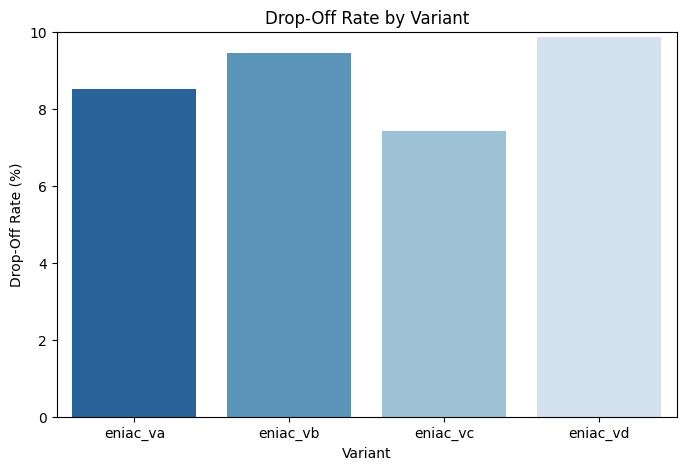

<ipython-input-156-fc60e0f40b26>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variant", y="Homepage Return Rate", data=chi_square_data_dohr, palette="Greens_r")


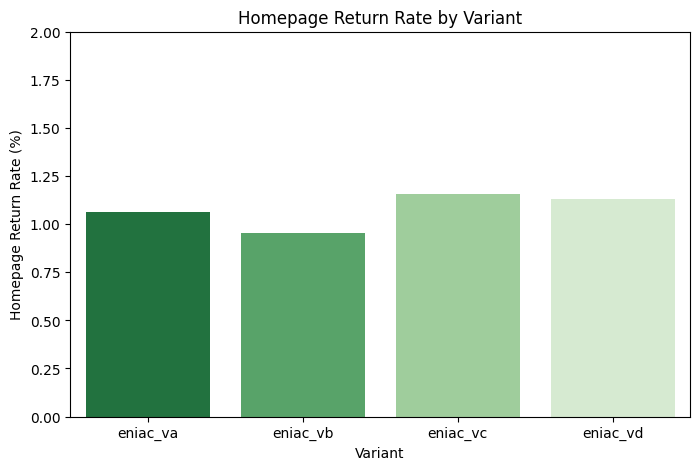


Final DataFrame for Drop-Off & Homepage Return Rate:
    Variant  Drop-Off Rate  Homepage Return Rate
0  eniac_va       8.497197              1.062150
1  eniac_vb       9.455692              0.953651
2  eniac_vc       7.416787              1.157742
3  eniac_vd       9.868030              1.129473


In [156]:
import seaborn as sns

# List of DataFrame variables
variants = ["eniac_va", "eniac_vb", "eniac_vc", "eniac_vd"]
chi_square_data_dohr = []



for variant in variants:
    df = globals().get(variant)  # Get the actual DataFrame object by name
    if df is None:
        print(f"Warning: DataFrame {variant} not found.")
        continue

    # Extract number of visits from "Snapshot Information" column
    snapshot_info = df["Snapshot information"].dropna().astype(str)

    visits = None
    for info in snapshot_info:
        match = re.search(r"(\d+) visits", info)
        if match:
            visits = int(match.group(1))
            break

    if not visits:  # Ensures visits is not None or 0
        print(f"Warning: Could not extract valid visits for {variant}")
        continue

    # Calculate Drop-Off Rate (convert to percentage)
    total_clicks = df["No. clicks"].sum()
    drop_off_rate = (1 - (total_clicks / visits)) * 100  # Convert to %

    # Calculate Homepage Return Rate (convert to percentage)
    homepage_clicks = df.loc[df["Name"].isin(["ENIAC", "Homepage"]), "No. clicks"].sum()
    homepage_return_rate = (homepage_clicks / visits) * 100  # Convert to %

    chi_square_data_dohr.append([variant, drop_off_rate, homepage_return_rate])

# Convert to DataFrame
chi_square_data_dohr = pd.DataFrame(chi_square_data_dohr, columns=["Variant", "Drop-Off Rate", "Homepage Return Rate"])

# Plot Drop-Off Rate (Max 10%)
plt.figure(figsize=(8, 5))
sns.barplot(x="Variant", y="Drop-Off Rate", data=chi_square_data_dohr, palette="Blues_r")
plt.title("Drop-Off Rate by Variant")
plt.ylim(0, 10)  # Max is 10%
plt.ylabel("Drop-Off Rate (%)")
plt.xlabel("Variant")
plt.show()

# Plot Homepage Return Rate (Max 15%)
plt.figure(figsize=(8, 5))
sns.barplot(x="Variant", y="Homepage Return Rate", data=chi_square_data_dohr, palette="Greens_r")
plt.title("Homepage Return Rate by Variant")
plt.ylim(0, 2)  # Max is 15%
plt.ylabel("Homepage Return Rate (%)")
plt.xlabel("Variant")
plt.show()

print("\nFinal DataFrame for Drop-Off & Homepage Return Rate:")
print(chi_square_data_dohr)


Variant: eniac_va
Total Visits: 25326
Total Clicks: 23174
Homepage Clicks: 269
Homepage Return Rate: 1.06%

Variant: eniac_vb
Total Visits: 24747
Total Clicks: 22407
Homepage Clicks: 236
Homepage Return Rate: 0.95%

Variant: eniac_vc
Total Visits: 24876
Total Clicks: 23031
Homepage Clicks: 288
Homepage Return Rate: 1.16%

Variant: eniac_vd
Total Visits: 25233
Total Clicks: 22743
Homepage Clicks: 285
Homepage Return Rate: 1.13%


<ipython-input-117-406697c6e9eb>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variant", y="Drop-Off Rate", data=chi_square_data_dohr, palette="Blues_r")


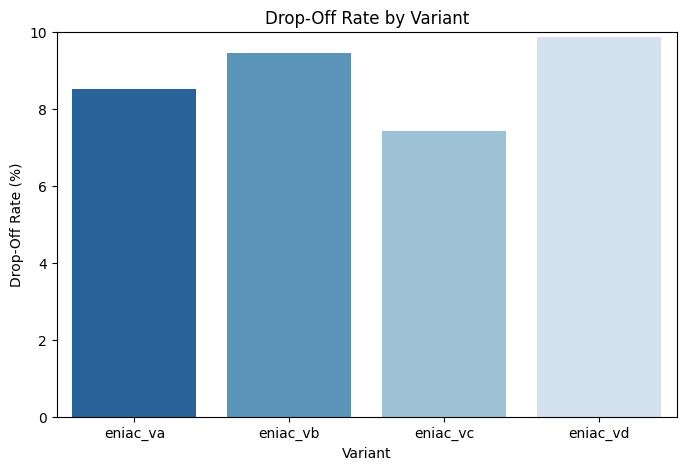

<ipython-input-117-406697c6e9eb>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variant", y="Homepage Return Rate", data=chi_square_data_dohr, palette="Greens_r")


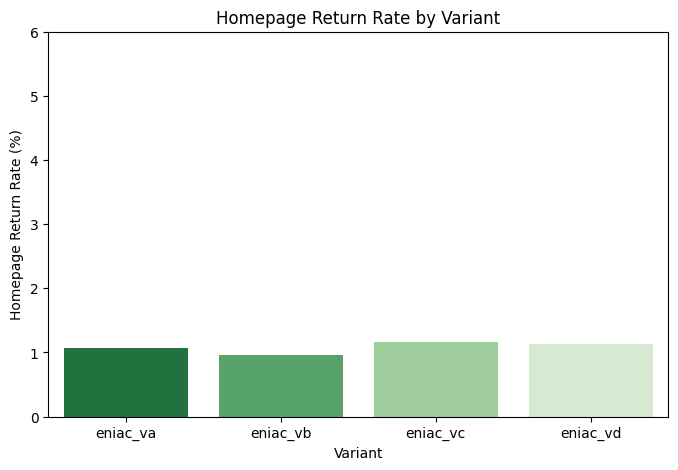


Final DataFrame for Drop-Off & Homepage Return Rate:
    Variant  Drop-Off Rate  Homepage Return Rate
0  eniac_va       8.497197              1.062150
1  eniac_vb       9.455692              0.953651
2  eniac_vc       7.416787              1.157742
3  eniac_vd       9.868030              1.129473


In [117]:
# List of DataFrame variables
variants = ["eniac_va", "eniac_vb", "eniac_vc", "eniac_vd"]
chi_square_data_dohr = []

for variant in variants:
    df = globals().get(variant)  # Get the actual DataFrame object by name
    if df is None:
        print(f"Warning: DataFrame {variant} not found.")
        continue

    # Extract number of visits from "Snapshot Information" column
    snapshot_info = df["Snapshot information"].dropna().astype(str)

    visits = None
    for info in snapshot_info:
        match = re.search(r"(\d+) visits", info)
        if match:
            visits = int(match.group(1))
            break

    if visits is None or visits == 0:
        print(f"Warning: Could not extract valid visits for {variant}")
        continue

    # Calculate Drop-Off Rate
    total_clicks = df["No. clicks"].sum()
    drop_off_rate = (1 - (total_clicks / visits)) * 100  # Convert to %

    # **Fixing Homepage Return Rate Calculation**
    homepage_clicks = df[df["Name"].str.contains("ENIAC|Homepage", case=False, na=False)]["No. clicks"].sum()
    homepage_return_rate = (homepage_clicks / visits) * 100  # Convert to %

    # Debugging Print Statements
    print(f"\nVariant: {variant}")
    print(f"Total Visits: {visits}")
    print(f"Total Clicks: {total_clicks}")
    print(f"Homepage Clicks: {homepage_clicks}")
    print(f"Homepage Return Rate: {homepage_return_rate:.2f}%")

    chi_square_data_dohr.append([variant, drop_off_rate, homepage_return_rate])

# Convert to DataFrame
chi_square_data_dohr = pd.DataFrame(chi_square_data_dohr, columns=["Variant", "Drop-Off Rate", "Homepage Return Rate"])

# Plot Drop-Off Rate (Max 10%)
plt.figure(figsize=(8, 5))
sns.barplot(x="Variant", y="Drop-Off Rate", data=chi_square_data_dohr, palette="Blues_r")
plt.title("Drop-Off Rate by Variant")
plt.ylim(0, 10)  # Max is 10%
plt.ylabel("Drop-Off Rate (%)")
plt.xlabel("Variant")
plt.show()

# Plot Homepage Return Rate (Max 6% for visibility)
plt.figure(figsize=(8, 5))
sns.barplot(x="Variant", y="Homepage Return Rate", data=chi_square_data_dohr, palette="Greens_r")
plt.title("Homepage Return Rate by Variant")
plt.ylim(0, 6)  # Max is 6% to ensure visibility
plt.ylabel("Homepage Return Rate (%)")
plt.xlabel("Variant")
plt.show()

print("\nFinal DataFrame for Drop-Off & Homepage Return Rate:")
print(chi_square_data_dohr)